In [ ]:
import pandas as pd

# 텍스트 파일 경로 지정 (csv 파일 형식)
file_path = '/content/drive/MyDrive/Colab Notebooks/data/TSLA 20~23.09 일별 거래량.csv'  # 파일 경로 및 파일명을 지정하세요

# 텍스트 파일 불러오기
df = pd.read_csv(file_path)

# '거래량' 열을 문자열로 변환하고 'M' 제거
df['거래량'] = df['거래량'].astype(str).str.replace('M', '')

# '거래량' 열을 숫자로 변환
df['거래량'] = df['거래량'].astype(float)

# '날짜' 열을 날짜 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 데이터를 3개월씩 나누기
start_date = df['날짜'].min()  # 데이터의 시작 날짜
end_date = df['날짜'].max()    # 데이터의 끝 날짜
month_step = 3               # 3개월 간격으로 데이터를 나눔

# 데이터를 3개월씩 분할
date_ranges = pd.date_range(start=start_date, end=end_date, freq=f'{month_step}M')

# 데이터를 3개월씩 분할한 결과를 담을 리스트
data_splits = []

# 날짜 범위별로 데이터를 나누어 리스트에 추가
for i in range(len(date_ranges) - 1):
    start_date = date_ranges[i]
    end_date = date_ranges[i + 1]
    split_data = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)]
    data_splits.append(split_data)

# 마지막 3개월 데이터도 추가
last_split = df[df['날짜'] >= date_ranges[-1]]
data_splits.append(last_split)

# 각 3개월 데이터별 거래량 평균 구하고 출력
for i, split in enumerate(data_splits, 1):
    # 거래량 평균 계산
    average_volume = split['거래량'].astype(float).mean()

    # 거래량의 95번째 백분위수 계산
    percentile_95 = split['거래량'].astype(float).quantile(0.95)

    # 평균보다 높은 피크데이 중 상위 5% 찾기
    peak_days = split[split['거래량'].astype(float) > percentile_95]['날짜']

    # 결과 출력
    #print(f"3개월 데이터 {i}의 거래량 평균: {average_volume}")
    print(f"3개월 데이터 {i}의 평균보다 높은 피크데이 중 상위 5%: {peak_days.tolist()}")


3개월 데이터 1의 평균보다 높은 피크데이 중 상위 5%: [Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-03 00:00:00')]
3개월 데이터 2의 평균보다 높은 피크데이 중 상위 5%: [Timestamp('2020-07-23 00:00:00'), Timestamp('2020-07-13 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-04-30 00:00:00')]
3개월 데이터 3의 평균보다 높은 피크데이 중 상위 5%: [Timestamp('2020-09-08 00:00:00'), Timestamp('2020-09-04 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-08-27 00:00:00')]
3개월 데이터 4의 평균보다 높은 피크데이 중 상위 5%: [Timestamp('2021-01-08 00:00:00'), Timestamp('2020-12-18 00:00:00'), Timestamp('2020-11-18 00:00:00')]
3개월 데이터 5의 평균보다 높은 피크데이 중 상위 5%: [Timestamp('2021-03-09 00:00:00'), Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-04 00:00:00'), Timestamp('2021-02-23 00:00:00')]
3개월 데이터 6의 평균보다 높은 피크데이 중 상위 5%: [Timestamp('2021-06-24 00:00:00'), Timestamp('2021-05-13 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-04-30 00:00:00')]
3개월 데이터 7의 평균보

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

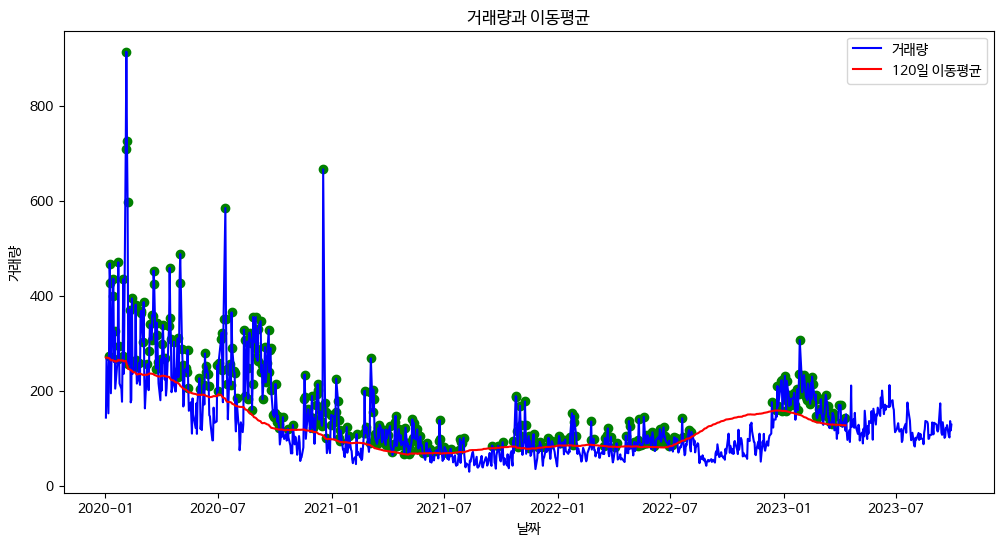

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 거래량 데이터 불러오기
# df = pd.read_csv('거래량데이터.csv')  # 실제 파일 경로를 사용하세요
# 날짜 열을 Datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
# 날짜를 인덱스로 설정
df.set_index('날짜', inplace=True)

# 10일 이동평균 계산
moving_average = df['거래량'].rolling(window=120).mean()

# 원래 거래량과 이동평균을 함께 그리기
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['거래량'], label='거래량', color='blue')
plt.plot(moving_average.index, moving_average, label='120일 이동평균', color='red')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.legend()
plt.title('거래량과 이동평균')

# 거래량이 이동평균선보다 위에 있는 날짜를 찾아 표시
above_average_days = df[df['거래량'] > moving_average]['거래량']
plt.scatter(above_average_days.index, above_average_days, color='green', label='이동평균보다 높은 거래량', marker='o')

plt.show()


In [ ]:
import pandas as pd

# 120일 이동평균 계산
moving_average = df['거래량'].rolling(window=120).mean()

# 거래량이 이동평균선보다 위에 있는 날짜를 찾아 표시
above_average_days = df[df['거래량'] > moving_average]

# 날짜와 거래량을 리스트로 정리
above_average_info = above_average_days[['날짜', '거래량']].values.tolist()

# 정리한 정보 출력
for date, volume in above_average_info:
    print(f"날짜: {date.date()}, 거래량: {volume:.2f}")


날짜: 2023-04-10, 거래량: 142.15
날짜: 2023-04-05, 거래량: 133.88
날짜: 2023-04-03, 거래량: 169.55
날짜: 2023-03-31, 거래량: 170.22
날짜: 2023-03-23, 거래량: 144.19
날짜: 2023-03-22, 거래량: 150.38
날짜: 2023-03-21, 거래량: 153.39
날짜: 2023-03-20, 거래량: 129.68
날짜: 2023-03-17, 거래량: 133.20
날짜: 2023-03-15, 거래량: 146.00
날짜: 2023-03-14, 거래량: 143.72
날짜: 2023-03-13, 거래량: 167.79
날짜: 2023-03-10, 거래량: 191.49
날짜: 2023-03-09, 거래량: 170.02
날짜: 2023-03-08, 거래량: 151.90
날짜: 2023-03-07, 거래량: 148.13
날짜: 2023-03-03, 거래량: 154.19
날짜: 2023-03-02, 거래량: 181.98
날짜: 2023-03-01, 거래량: 156.85
날짜: 2023-02-28, 거래량: 153.14
날짜: 2023-02-27, 거래량: 161.03
날짜: 2023-02-24, 거래량: 142.23
날짜: 2023-02-23, 거래량: 146.36
날짜: 2023-02-22, 거래량: 191.83
날짜: 2023-02-21, 거래량: 180.02
날짜: 2023-02-17, 거래량: 213.74
날짜: 2023-02-16, 거래량: 229.59
날짜: 2023-02-15, 거래량: 182.11
날짜: 2023-02-14, 거래량: 216.46
날짜: 2023-02-13, 거래량: 172.48
날짜: 2023-02-10, 거래량: 204.75
날짜: 2023-02-09, 거래량: 215.43
날짜: 2023-02-08, 거래량: 180.67
날짜: 2023-02-07, 거래량: 186.01
날짜: 2023-02-06, 거래량: 186.19
날짜: 2023-02-03, 거래량:

In [ ]:
import pandas as pd

# 120일 이동평균 계산
moving_average = df['거래량'].rolling(window=120).mean()

# 거래량이 이동평균선보다 위에 있는 행 선택
above_average_days = df[df['거래량'] > moving_average]

# 거래량이 이동평균선보다 위에 있는 날짜의 수 계산
count_above_average = above_average_days.shape[0]

# 결과 출력
print(f"거래량이 이동평균선보다 위에 있는 날짜의 수: {count_above_average}일")


거래량이 이동평균선보다 위에 있는 날짜의 수: 411일


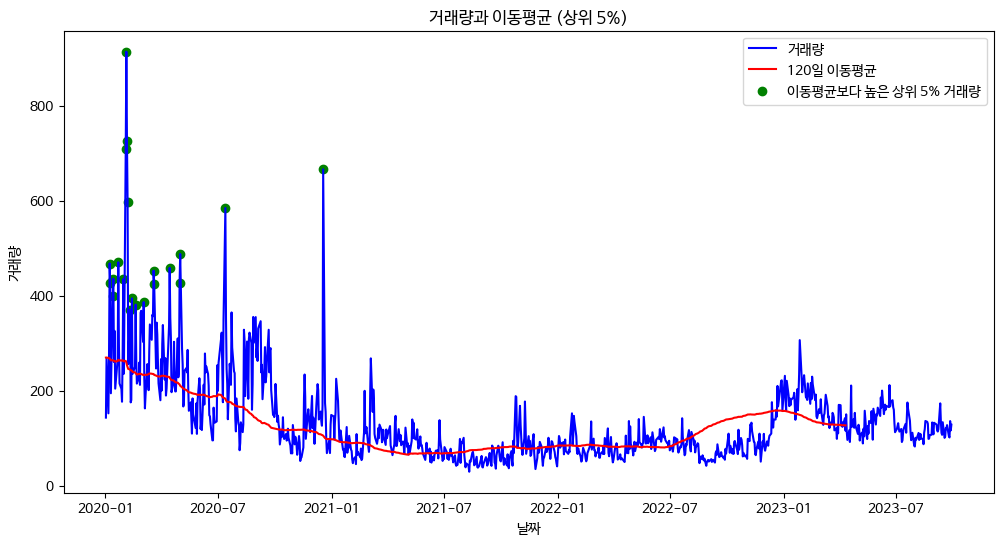

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 거래량 데이터 불러오기
# df = pd.read_csv('거래량데이터.csv')  # 실제 파일 경로를 사용하세요
# 날짜 열을 Datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
# 날짜를 인덱스로 설정
df.set_index('날짜', inplace=True)

# 120일 이동평균 계산
moving_average = df['거래량'].rolling(window=120).mean()

# 거래량이 이동평균선보다 위에 있는 날짜를 찾아 표시
above_average_days = df[df['거래량'] > moving_average]

# 거래량의 95번째 백분위수 계산
percentile_95 = above_average_days['거래량'].quantile(0.95)

# 거래량 중 상위 5%만 선택
top_5_percent = above_average_days[above_average_days['거래량'] > percentile_95]

# 원래 거래량과 이동평균을 함께 그리기
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['거래량'], label='거래량', color='blue')
plt.plot(moving_average.index, moving_average, label='120일 이동평균', color='red')
plt.scatter(top_5_percent.index, top_5_percent['거래량'], color='green', label='이동평균보다 높은 상위 5% 거래량', marker='o')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.legend()
plt.title('거래량과 이동평균 (상위 5%)')

plt.show()


In [ ]:
import pandas as pd

# 120일 이동평균 계산
moving_average = df['거래량'].rolling(window=120).mean()

# 거래량이 이동평균선보다 위에 있는 날짜를 찾아 표시
above_average_days = df[df['거래량'] > moving_average]

# 거래량의 95번째 백분위수 계산
percentile_95 = above_average_days['거래량'].quantile(0.95)

# 거래량 중 상위 5%만 선택
top_5_percent = above_average_days[above_average_days['거래량'] > percentile_95]

# 상위 5% 거래량 중의 개수 확인
number_of_top_5_percent = len(top_5_percent)

print(f"거래량 데이터 중 120일 이동평균선보다 위에 있는 거래량 중 상위 5%의 개수: {number_of_top_5_percent}")


거래량 데이터 중 120일 이동평균선보다 위에 있는 거래량 중 상위 5%의 개수: 21
